In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install tensorflow

  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.13.0
    Uninstalling tensorflow-intel-2.13.0:
      Successfully uninstalled tensorflow-intel-2.13.0


In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Input, Dropout, Lambda

In [8]:
from keras.models import Model
from keras.applications.vgg16 import VGG16


In [9]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

Creating an object of VGG16 class, with its original weights used in imagenet challenge. Excluding the last layer from its architecture.

In [10]:
conv_base = VGG16(weights='imagenet',include_top = False,input_shape=(256,256,3))

Freezing the weights in conv_base therefore we won't train those weights

In [11]:
for layer in conv_base.layers:
    layer.trainable = False
#conv_base.trainable = False

Creating a sequential model with conv_base layers and 2 dense layers including the ouput layer

In [12]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Importing the images from train folder, applying data augmentation and creating train and validation datasets.

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,    #Normalozing the pixel values using min-max scaling
#                              shear_range=0.2,   # Shear the image by up to 20%
#                              zoom_range=0.2,    # Zoom in or out on the image by up to 20%
#                              horizontal_flip=True, # Flip the image horizontally
                             validation_split = 0.2)

# Load images from directory
directory = 'train'
batch_size = 32
img_height = 256
img_width = 256

train_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset = 'training')

test_generator = datagen.flow_from_directory(
        directory,
        target_size = (img_height, img_width),
        batch_size = batch_size,
        class_mode = 'binary',
        subset = 'validation')

Found 11975 images belonging to 2 classes.
Found 2993 images belonging to 2 classes.


In [14]:
for x_batch, y_batch in train_generator:
    print(x_batch.shape)
    print(y_batch.shape)
    break

(32, 256, 256, 3)
(32,)


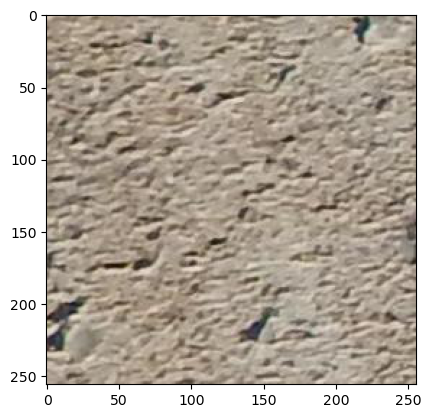

In [15]:
import random
idx = random.randint(0, len(y_batch))
plt.imshow(x_batch[idx, :])
#plt.show()

In [16]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
375/375 [==============================] - 3512s 9s/step - loss: 0.6315 - accuracy: 0.6852 - val_loss: 0.4966 - val_accuracy: 0.7327
Epoch 2/10
375/375 [==============================] - 3862s 10s/step - loss: 0.4863 - accuracy: 0.7558 - val_loss: 0.4774 - val_accuracy: 0.7457
Epoch 3/10
375/375 [==============================] - 14426s 39s/step - loss: 0.4520 - accuracy: 0.7732 - val_loss: 0.4651 - val_accuracy: 0.7711
Epoch 4/10
375/375 [==============================] - 1805s 5s/step - loss: 0.4135 - accuracy: 0.8007 - val_loss: 0.4618 - val_accuracy: 0.7725
Epoch 5/10
375/375 [==============================] - 1789s 5s/step - loss: 0.4030 - accuracy: 0.8021 - val_loss: 0.4989 - val_accuracy: 0.7661
Epoch 6/10
375/375 [==============================] - ETA: 0s - loss: 0.3784 - accuracy: 0.8144

In [ ]:
import os
import tensorflow as tf
test_path = 'test'
#test_filenames = os.listdir(test_path)  
test_predictions = np.array([])
test_labels=[]

for img in os.listdir(test_path):
    image_path = os.path.join(test_path,img)
    image_path
    image = tf.keras.utils.load_img(image_path, target_size = (224,224))
    image = tf.keras.utils.img_to_array(image)
    image = np.array([image])
    image = image/255
    predictions = np.squeeze((model.predict(image) >= 0.5))
    test_predictions = np.append(test_predictions, predictions)
    if predictions==1:
        test_labels.append("uncracked")
    elif predictions==0:
        test_labels.append("cracked")
#         break
#print(test_predictions)

In [ ]:
import pandas as pd
filename=os.listdir('test')

data = pd.DataFrame({'filename':filename,'class':test_labels})
# data['class']=data['class'].apply(str)
# data
# data['class']=data['class'].str.replace('0.0','cracked')
# data['class']=data['class'].str.replace('1.0','uncracked')
data.to_csv('output2_assg2.csv')